In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date


In [2]:
today = date.today()

In [3]:
start = '2014-01-01'
end = today

stock = 'RELIANCE.NS'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2014-01-01,180.022537,181.936593,179.779476,181.774547,5849398
2014-01-02,177.227402,181.480860,176.234930,179.799725,6023632
2014-01-03,175.050034,176.893200,173.176486,176.538742,12833897
2014-01-06,173.166382,174.847517,172.163783,174.614582,13315857
2014-01-07,170.563675,174.179106,170.148455,173.095491,17311470
...,...,...,...,...,...
2025-03-07,1249.800049,1254.800049,1212.000000,1216.000000,16474965
2025-03-10,1238.400024,1258.000000,1235.400024,1245.000000,11931051


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2014-01-01,180.022537,181.936593,179.779476,181.774547,5849398
1,2014-01-02,177.227402,181.480860,176.234930,179.799725,6023632
2,2014-01-03,175.050034,176.893200,173.176486,176.538742,12833897
3,2014-01-06,173.166382,174.847517,172.163783,174.614582,13315857
4,2014-01-07,170.563675,174.179106,170.148455,173.095491,17311470
...,...,...,...,...,...,...
2758,2025-03-07,1249.800049,1254.800049,1212.000000,1216.000000,16474965
2759,2025-03-10,1238.400024,1258.000000,1235.400024,1245.000000,11931051
2760,2025-03-11,1247.300049,1249.500000,1229.750000,1240.000000,10089838


In [7]:
ma_100_days = data.Close.rolling(100).mean

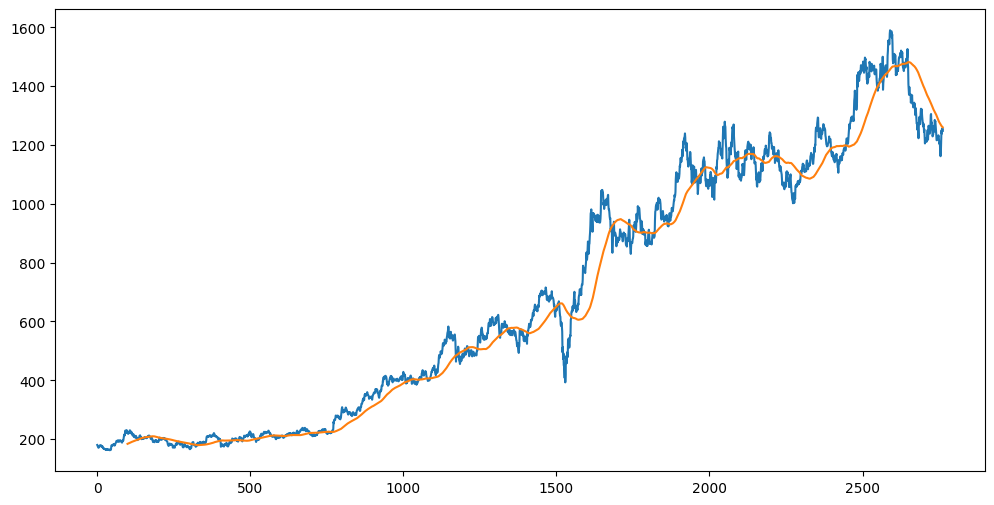

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.plot(data['Close'].rolling(100).mean())

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2210

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
Scalar = MinMaxScaler(feature_range=(0, 1))
data_training_scale = Scalar.fit_transform(data_train)

In [14]:
x = []
y= []

for i in range (100 , data_training_scale.shape[0]):
    x.append(data_training_scale[i-100:i])
    y.append(data_training_scale[i, 0])

In [15]:
x,y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\ADITYA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 0.0851
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0083
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0082
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0081
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0074
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0074
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0065
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0059
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0052
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0053
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0053
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0042
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0040
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0039
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.004

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [22]:
data_test_scale = Scalar.fit_transform(data_test)

In [23]:
x = []
y= []

for i in range (100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

In [24]:
x,y = np.array(x),np.array(y)

In [25]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [26]:
scale = 1/Scalar.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y = y*scale

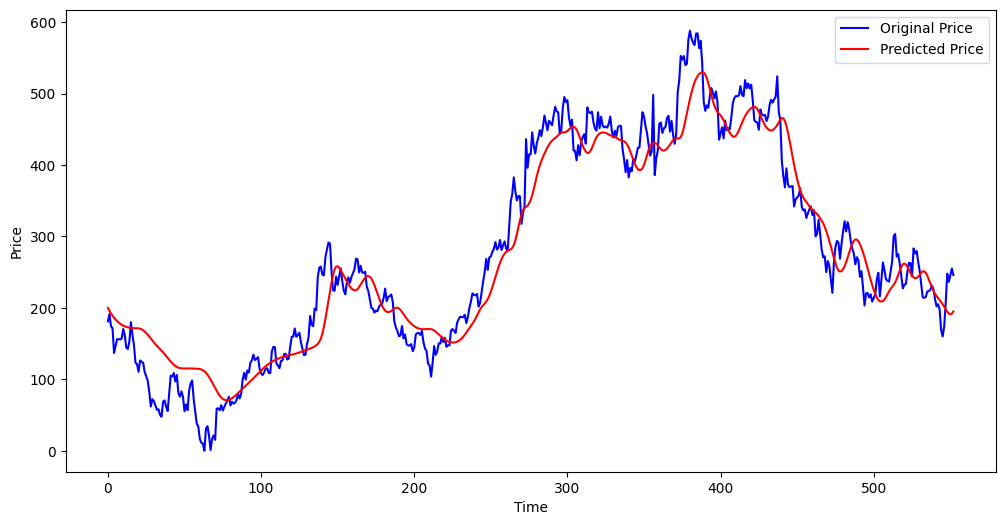

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y, 'b', label='Original Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [30]:
model.save('Stock Prediction Model.keras')